# Predicting Behavior To Retain Telco Customers
### Author: Alex Heinz
## Objective
Customer churn is when a customer ends their relationship with a business. Looking at the Telco data from the customers perspectives and services, I use various models to predict behavior and decisions to retain customers. 

In this supervised learning capstone, I am building supervised machine learning models:
<ul>
<li>To solve a business problem and predict customer churn</li>
<li>Evaluate how well the models can predict customer churn based on observed customer churn data.</li>
</ul>

## Data

I used [Telco Customer Data](https://www.kaggle.com/blastchar/telco-customer-churn) from the IBM Watson Studio via Kaggle. The dataset provides detailed information about customer services and Telco customer churn including:

<ul>
    <li>Services each customer has signed up for</li>
    <li>Customer account information</li>
    <li>Demographic information abbout customers</li>
</ul>



## Import Relevant Packages

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy
import sklearn
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Ploting
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
from IPython.display import display
pd.options.display.float_format = '{:.3f}'.format

# Suppressing annoying harmless error
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
df = pd.read_csv(r'/Users/alexanderheinz/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


## Print Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Continuous Data Summary

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000,7043.000,7043.000
mean,0.162,32.371,64.762
std,0.369,24.559,30.090
min,0.000,0.000,18.250
25%,0.000,9.000,35.500
50%,0.000,29.000,70.350
75%,0.000,55.000,89.850
max,1.000,72.000,118.750


## All Data Summary

In [6]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000,7043,7043,7043.000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000,7043,7043
unique,7043,2,nan,2,2,nan,2,3,3,3,3,3,3,3,3,3,2,4,nan,6531,2
top,8815-LMFLX,Male,nan,No,No,nan,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,nan,,No
freq,1,3555,nan,3641,4933,nan,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,nan,11,5174
mean,NaN,NaN,0.162,NaN,NaN,32.371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.762,NaN,NaN
std,NaN,NaN,0.369,NaN,NaN,24.559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090,NaN,NaN
min,NaN,NaN,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250,NaN,NaN
25%,NaN,NaN,0.000,NaN,NaN,9.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500,NaN,NaN
50%,NaN,NaN,0.000,NaN,NaN,29.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350,NaN,NaN
75%,NaN,NaN,0.000,NaN,NaN,55.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850,NaN,NaN


## Examine Data Datatypes

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df.shape

(7043, 21)

## Unique Data Values

In [9]:
pd.Series({a: df[a].unique() for a in df})

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

## Examine Missing Data

In [10]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


# Exploratory Data Analysis
## Outcome Variable of Interest: Churn
Convert Categorical Values to Binary

In [12]:
# Convert yes/no/no service(internet) values to 1/0.
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,0,1,Electronic check,29.850,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,56.950,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,53.850,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.300,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,70.700,151.65,1


In [13]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,0,1,Electronic check,29.850,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,1,0,Mailed check,56.950,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,0,1,Mailed check,53.850,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.300,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,0,1,Electronic check,70.700,151.65,1


In [14]:
df['InternetService'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,Electronic check,29.850,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,Mailed check,56.950,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,Mailed check,53.850,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.300,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,Electronic check,70.700,151.65,1


## Examine Total Charges As An Object

In [15]:
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

print(sorted(df['TotalCharges'].unique()))

[' ', '100.2', '100.25', '100.35', '100.4', '100.8', '100.9', '1001.2', '1001.5', '1003.05', '1004.35', '1004.5', '1004.75', '1005.7', '1006.9', '1007.8', '1007.9', '1008.55', '1008.7', '1009.25', '101.1', '101.45', '101.65', '101.9', '1010', '1011.05', '1011.5', '1011.8', '1012.4', '1013.05', '1013.2', '1013.35', '1013.6', '1014.25', '1016.7', '1017.35', '102.45', '102.5', '102.75', '1020.2', '1020.75', '1021.55', '1021.75', '1021.8', '1022.5', '1022.6', '1022.95', '1023.75', '1023.85', '1023.9', '1023.95', '1024', '1024.65', '1024.7', '1025.05', '1025.15', '1025.95', '1026.35', '1027.25', '1028.75', '1028.9', '1029.35', '1029.75', '1029.8', '103.7', '1031.1', '1031.4', '1031.7', '1032', '1032.05', '1033', '1033.9', '1033.95', '1035.5', '1035.7', '1036', '1036.75', '1037.75', '1039.45', '104.2', '104.3', '1041.8', '1042.65', '1043.3', '1043.35', '1043.4', '1043.8', '1045.25', '1046.1', '1046.2', '1046.5', '1047.7', '1048.45', '1048.85', '1049.05', '1049.6', '105.5', '105.6', '1050.5',

In [16]:
#Examine space found in total charges
space_for_charge = df[df['TotalCharges'] == ' ']
space_for_charge

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1,1,0,0,0,1,1,0,1,1,1,0,2,1,Bank transfer (automatic),52.550,,0
753,3115-CZMZD,1,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,Mailed check,20.250,,0
936,5709-LVOEQ,0,0,1,1,0,1,0,1,1,1,1,0,1,1,2,0,Mailed check,80.850,,0
1082,4367-NUYAO,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,Mailed check,25.750,,0
1340,1371-DWPAZ,0,0,1,1,0,0,0,1,1,1,1,1,1,0,2,0,Credit card (automatic),56.050,,0
3331,7644-OMVMY,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,Mailed check,19.850,,0
3826,3213-VVOLG,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,Mailed check,25.350,,0
4380,2520-SGTTA,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,Mailed check,20.000,,0
5218,2923-ARZLG,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,Mailed check,19.700,,0
6670,4075-WKNIU,0,0,1,1,0,1,1,1,0,1,1,1,1,0,2,0,Mailed check,73.350,,0


In [17]:
#Convert space to string '0'
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,Electronic check,29.850,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,Mailed check,56.950,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,Mailed check,53.850,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.300,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,Electronic check,70.700,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,Mailed check,84.800,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,Credit card (automatic),103.200,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,Electronic check,29.600,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,Mailed check,74.400,306.6,1


In [18]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

### Convert and Remove Object From Total Charges

In [19]:
# zero Total Charges
zero = df[df['TotalCharges'] == 0]
zero

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1,1,0,0,0,1,1,0,1,1,1,0,2,1,Bank transfer (automatic),52.550,0.000,0
753,3115-CZMZD,1,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,Mailed check,20.250,0.000,0
936,5709-LVOEQ,0,0,1,1,0,1,0,1,1,1,1,0,1,1,2,0,Mailed check,80.850,0.000,0
1082,4367-NUYAO,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,Mailed check,25.750,0.000,0
1340,1371-DWPAZ,0,0,1,1,0,0,0,1,1,1,1,1,1,0,2,0,Credit card (automatic),56.050,0.000,0
3331,7644-OMVMY,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,Mailed check,19.850,0.000,0
3826,3213-VVOLG,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,Mailed check,25.350,0.000,0
4380,2520-SGTTA,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,Mailed check,20.000,0.000,0
5218,2923-ARZLG,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,Mailed check,19.700,0.000,0
6670,4075-WKNIU,0,0,1,1,0,1,1,1,0,1,1,1,1,0,2,0,Mailed check,73.350,0.000,0


In [20]:
# Get rid of zeros at Total Charges. Make as new dataframe.
df = df[df['TotalCharges'] != 0]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,Electronic check,29.850,29.850,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,Mailed check,56.950,1889.500,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,Mailed check,53.850,108.150,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,Bank transfer (automatic),42.300,1840.750,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,Electronic check,70.700,151.650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,Mailed check,84.800,1990.500,0
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,Credit card (automatic),103.200,7362.900,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,Electronic check,29.600,346.450,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,Mailed check,74.400,306.600,1


In [21]:
zero

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1,1,0,0,0,1,1,0,1,1,1,0,2,1,Bank transfer (automatic),52.550,0.000,0
753,3115-CZMZD,1,0,0,1,0,1,0,0,0,0,0,0,0,0,2,0,Mailed check,20.250,0.000,0
936,5709-LVOEQ,0,0,1,1,0,1,0,1,1,1,1,0,1,1,2,0,Mailed check,80.850,0.000,0
1082,4367-NUYAO,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,Mailed check,25.750,0.000,0
1340,1371-DWPAZ,0,0,1,1,0,0,0,1,1,1,1,1,1,0,2,0,Credit card (automatic),56.050,0.000,0
3331,7644-OMVMY,1,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,Mailed check,19.850,0.000,0
3826,3213-VVOLG,1,0,1,1,0,1,1,0,0,0,0,0,0,0,2,0,Mailed check,25.350,0.000,0
4380,2520-SGTTA,0,0,1,1,0,1,0,0,0,0,0,0,0,0,2,0,Mailed check,20.000,0.000,0
5218,2923-ARZLG,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,Mailed check,19.700,0.000,0
6670,4075-WKNIU,0,0,1,1,0,1,1,1,0,1,1,1,1,0,2,0,Mailed check,73.350,0.000,0


## Examine Monthly Charges with Churn and No Churn

Text(0.5, 1.0, 'Distribution plot: Monthly Charges for Customers')

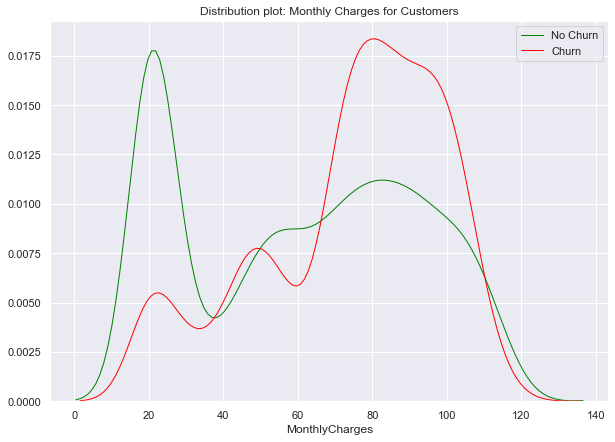

In [22]:
#Split samples, set figure style and size
minor=df[df['Churn']== 0]
serious=df[df['Churn']== 1]

sns.set(style="darkgrid")
plt.figure(figsize=(10,7))
minor
#Monthly Charges
sns.distplot(minor['MonthlyCharges'], rug=False, hist=False, 
             kde_kws={"color": "green", "lw": 1, "label": "No Churn"})
sns.distplot(serious['MonthlyCharges'], rug=False, hist=False, 
             kde_kws={"color": "red", "lw": 1, "label": "Churn"})
plt.title('Distribution plot: Monthly Charges for Customers')

## Examine Unique Values

In [23]:
pd.Series({b: df[b].unique() for b in df})

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                         [0, 1]
SeniorCitizen                                                  [0, 1]
Partner                                                        [1, 0]
Dependents                                                     [0, 1]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                   [0, 1]
MultipleLines                                                  [0, 1]
InternetService                                             [1, 2, 0]
OnlineSecurity                                                 [0, 1]
OnlineBackup                                                   [1, 0]
DeviceProtection                                               [0, 1]
TechSupport                                                    [0, 1]
StreamingTV                                                    [0, 1]
StreamingMovies     

## Check for Outliers via Box Plot

0.000    1.000
0.100    2.000
0.200    6.000
0.300   12.000
0.400   20.000
0.500   29.000
0.600   40.000
0.700   50.000
0.800   60.800
0.900   69.000
1.000   72.000
Name: tenure, dtype: float64

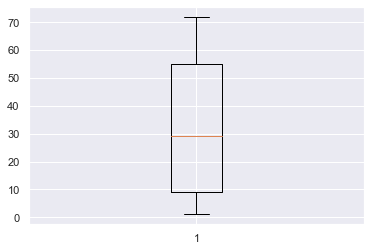

In [24]:
#Tenure
plt.boxplot(df.tenure)
df['tenure'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.000    18.250
0.100    20.050
0.200    25.050
0.300    45.900
0.400    58.920
0.500    70.350
0.600    79.150
0.700    85.535
0.800    94.300
0.900   102.645
1.000   118.750
Name: MonthlyCharges, dtype: float64

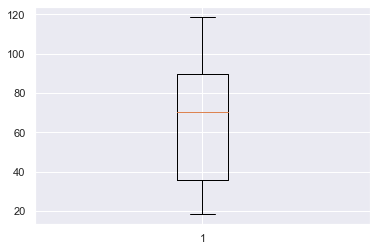

In [25]:
#Monthly Charges
plt.boxplot(df.MonthlyCharges)
df['MonthlyCharges'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

0.000     18.800
0.100     84.600
0.200    267.070
0.300    551.995
0.400    944.170
0.500   1397.475
0.600   2048.950
0.700   3141.130
0.800   4475.410
0.900   5976.640
1.000   8684.800
Name: TotalCharges, dtype: float64

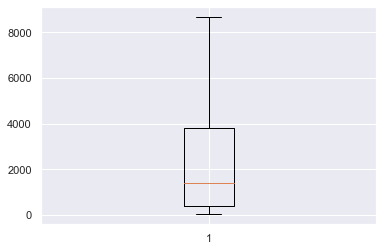

In [26]:
#Total Charges
plt.boxplot(df.TotalCharges)
df['TotalCharges'].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

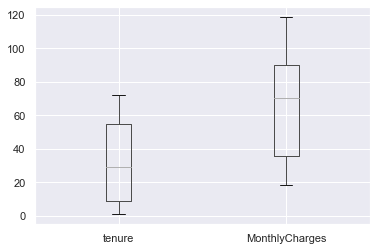

In [27]:
# Tenure and Monthly Charges
boxplot = df.boxplot(column=['tenure', 'MonthlyCharges'])

## Check for Outliers via Histogram

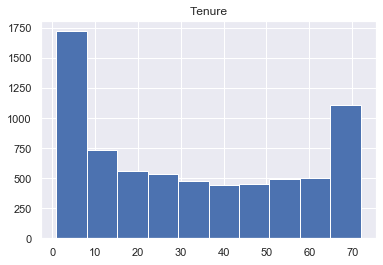

Median: 29.0
Std: 24.545259709263192
Outliers above: 78.09051941852638


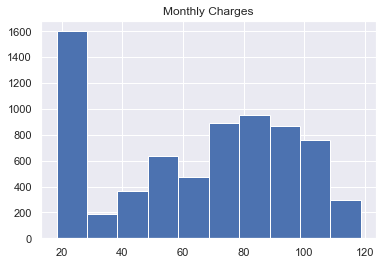

Median: 70.35
Std: 30.08597388404983
Outliers above: 130.52194776809966
Outliers below: 10.178052231900331


In [28]:
#Tenure
df['tenure'].hist()
plt.title('Tenure')
plt.show()

median = df['tenure'].median()
std = df['tenure'].std()
pop_out = median + 2 * std

print('Median: {}'.format(median))
print('Std: {}'.format(std))
print('Outliers above: {}'.format(pop_out))

#Monthly Charges
df['MonthlyCharges'].hist()
plt.title('Monthly Charges')
plt.show()

median = df['MonthlyCharges'].median()
std = df['MonthlyCharges'].std()
pop_out1 = median + 2 * std
pop_out2 = median - 2 * std

print('Median: {}'.format(median))
print('Std: {}'.format(std))
print('Outliers above: {}'.format(pop_out1))
print('Outliers below: {}'.format(pop_out2))


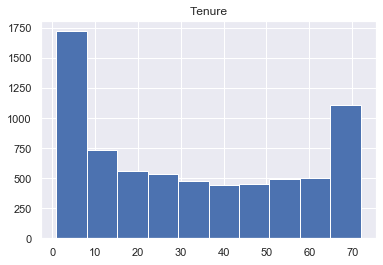

In [29]:
#Tenure
df['tenure'].hist()
plt.title('Tenure')
plt.show()

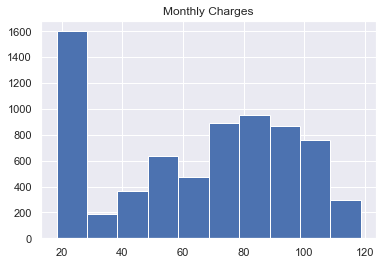

In [30]:
#Monthly Charges
df['MonthlyCharges'].hist()
plt.title('Monthly Charges')
plt.show()

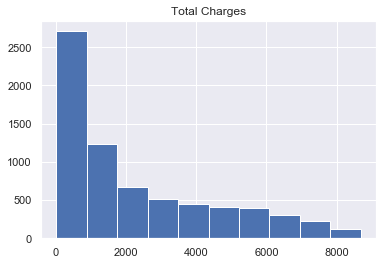

In [31]:
#Total Charges
df['TotalCharges'].hist()
plt.title('Total Charges')
plt.show()

## Examine Data via Histogram

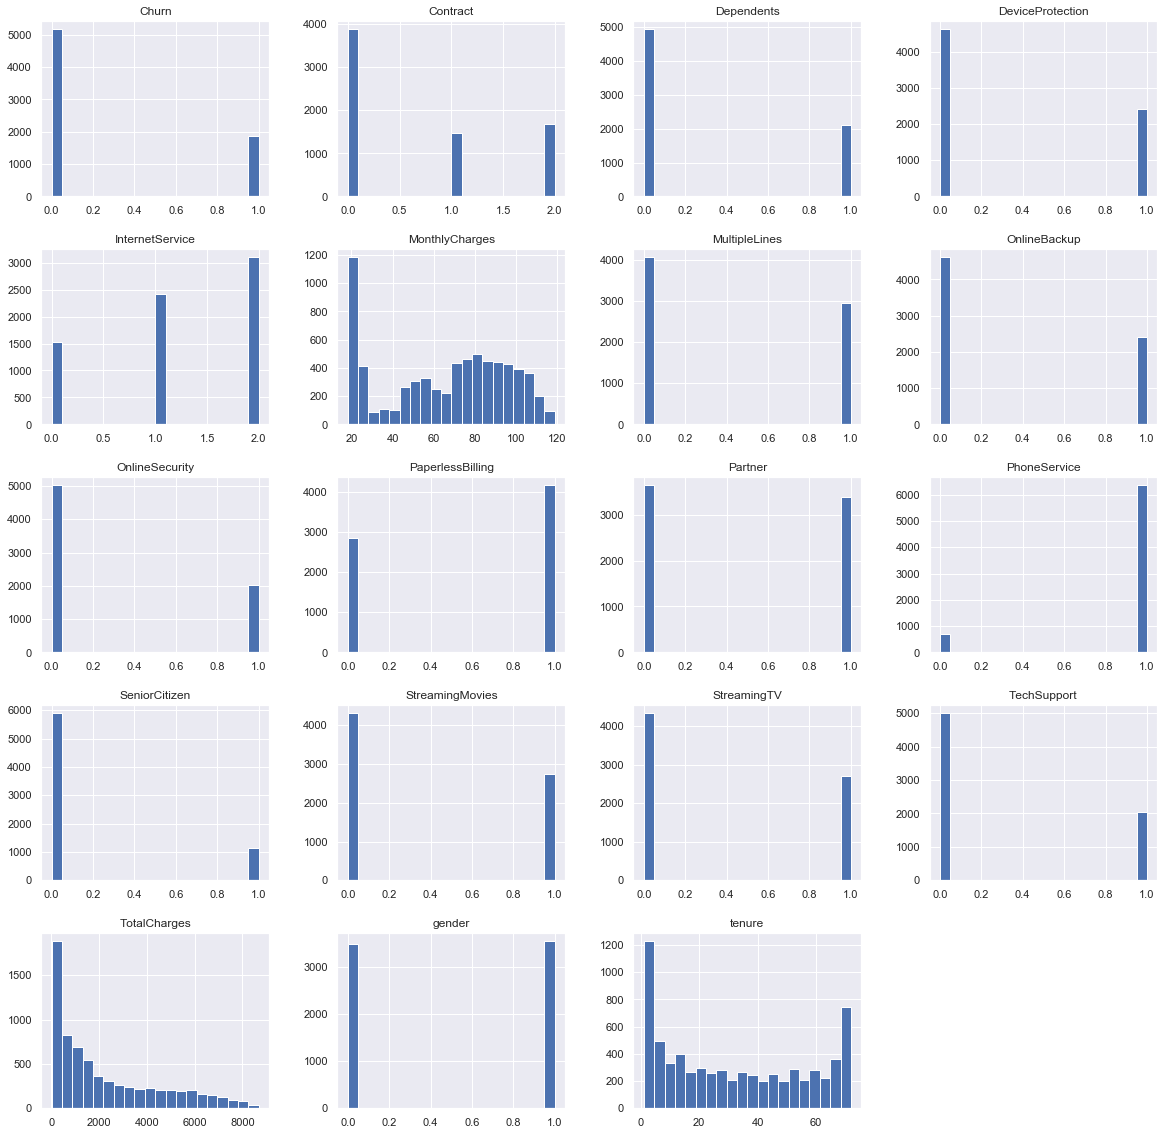

In [32]:
hist = df.hist(bins=20, figsize=(20, 20))

In [33]:
number = df[df['TotalCharges'] <= 24]
number
#Makes sense. Tenure is 1 and they only have phone service. 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,1066-JKSGK,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,Mailed check,20.150,20.150,1
33,7310-EGVHZ,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,Bank transfer (automatic),20.200,20.200,0
100,6380-ARCEH,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,Mailed check,20.200,20.200,0
101,3679-XASPY,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,Electronic check,19.450,19.450,0
128,3930-ZGWVE,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,Mailed check,19.750,19.750,0
199,3645-DEYGF,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,Mailed check,20.750,20.750,0
222,6469-MRVET,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,1,Electronic check,20.200,20.200,0
295,8203-XJZRC,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,Mailed check,20.250,20.250,0
310,1098-TDVUQ,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,Bank transfer (automatic),19.250,19.250,0
367,7302-ZHMHP,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,Mailed check,19.150,19.150,0


## Feature Engineering
Get Dummies for Payment Method

In [34]:
df = pd.concat([df, pd.get_dummies(df.PaymentMethod, prefix="PaymentMethod", drop_first=True)], axis=1)
dummy_column_name = list(pd.get_dummies(df.PaymentMethod, prefix="PaymentMethod", drop_first=True).columns)
df= df.drop(['PaymentMethod'], axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,29.850,29.850,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,56.950,1889.500,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,53.850,108.150,1,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,42.300,1840.750,0,0,0,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,70.700,151.650,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,1,1,1,0,1,1,1,1,1,1,84.800,1990.500,0,0,0,1
7039,2234-XADUH,0,0,1,1,72,1,1,2,0,1,1,0,1,1,1,1,103.200,7362.900,0,1,0,0
7040,4801-JZAZL,0,0,1,1,11,0,0,1,1,0,0,0,0,0,0,1,29.600,346.450,0,0,1,0
7041,8361-LTMKD,1,1,1,0,4,1,1,2,0,0,0,0,0,0,0,1,74.400,306.600,1,0,0,1


### Convert Dummies to int64

In [35]:
df['PaymentMethod_Credit card (automatic)'] = df['PaymentMethod_Credit card (automatic)'].astype('int64')
df['PaymentMethod_Electronic check'] = df['PaymentMethod_Electronic check'].astype('int64')
df['PaymentMethod_Mailed check'] = df['PaymentMethod_Mailed check'].astype('int64')

In [36]:
df.dtypes

customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
InternetService                            int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
Contract                                   int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
PaymentMethod_Credit

## Split Churn to Two Classes

In [37]:
churn = df[df['Churn'] == 1]

no_churn = df[df['Churn'] == 0]

In [38]:
churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000,1869.000
mean,0.498,0.255,0.358,0.174,17.979,0.909,0.455,1.633,0.158,0.280,0.292,0.166,0.436,0.438,0.140,0.749,74.441,1531.796,1.000,0.124,0.573,0.165
std,0.500,0.436,0.480,0.380,19.531,0.288,0.498,0.594,0.365,0.449,0.455,0.372,0.496,0.496,0.415,0.434,24.666,1890.823,0.000,0.330,0.495,0.371
min,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.850,18.850,1.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,2.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,56.150,134.500,1.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,10.000,1.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,79.650,703.550,1.000,0.000,1.000,0.000
75%,1.000,1.000,1.000,0.000,29.000,1.000,1.000,2.000,0.000,1.000,1.000,0.000,1.000,1.000,0.000,1.000,94.200,2331.300,1.000,0.000,1.000,0.000
max,1.000,1.000,1.000,1.000,72.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,118.350,8684.800,1.000,1.000,1.000,1.000


In [39]:
no_churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000,5163.000
mean,0.507,0.129,0.528,0.343,37.650,0.901,0.410,1.076,0.333,0.368,0.363,0.335,0.366,0.371,0.887,0.536,61.307,2555.344,0.000,0.250,0.251,0.251
std,0.500,0.335,0.499,0.475,24.077,0.298,0.492,0.784,0.471,0.482,0.481,0.472,0.482,0.483,0.857,0.499,31.095,2329.457,0.000,0.433,0.433,0.434
min,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.250,18.800,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,15.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,25.100,577.825,0.000,0.000,0.000,0.000
50%,1.000,0.000,1.000,0.000,38.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,64.450,1683.600,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,1.000,61.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,88.475,4264.125,0.000,0.000,1.000,1.000
max,1.000,1.000,1.000,1.000,72.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,118.750,8672.450,0.000,1.000,1.000,1.000


## Heatmap of Correlation Matrix (All)

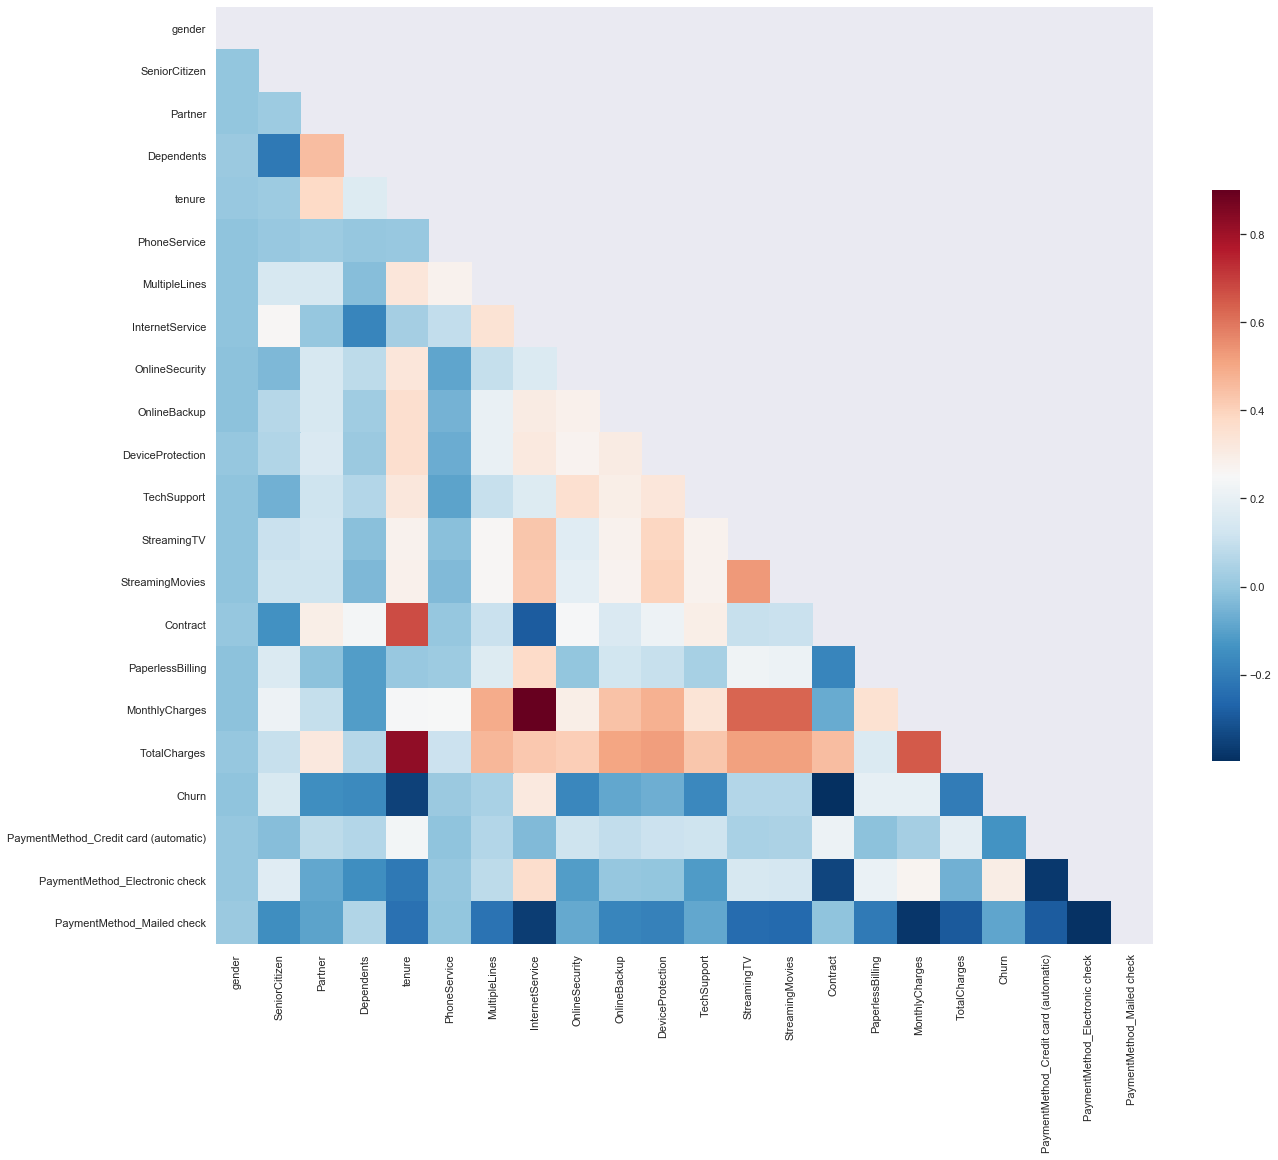

In [40]:
corrmat=df.corr()
plt.subplots(figsize=(21,21))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, mask=mask, vmax=0.9, cmap="RdBu_r", square=True, cbar_kws={"shrink": .5})


## Heatmap of Correlation Matrix (Churn)

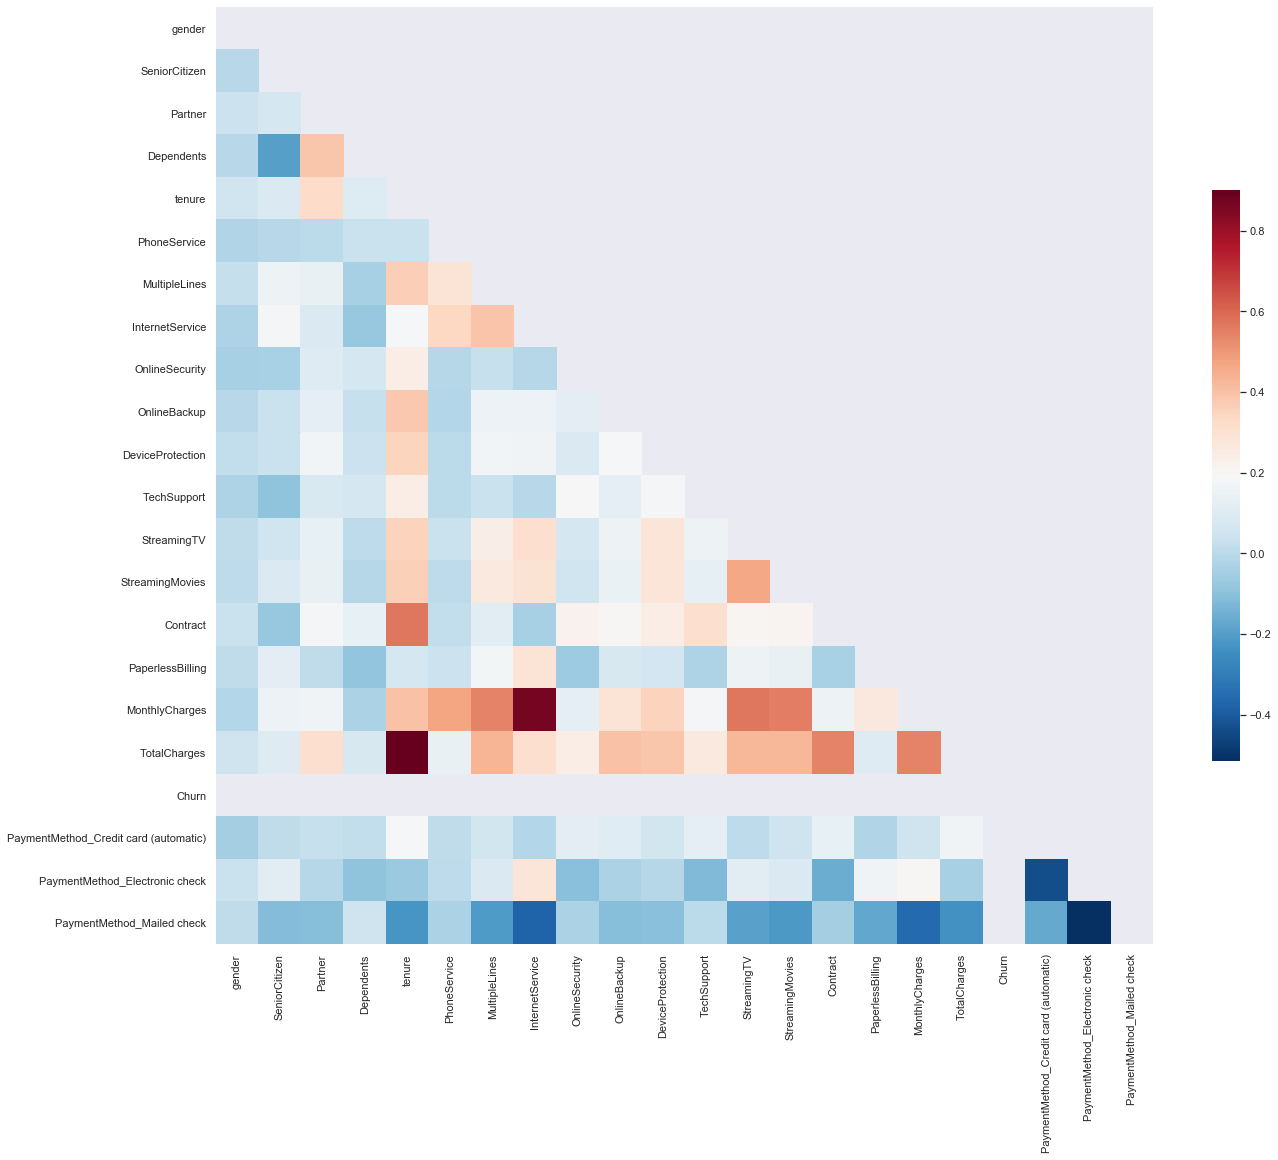

In [41]:
corrmat=churn.corr()
plt.subplots(figsize=(21,21))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, mask=mask, vmax=0.9, cmap="RdBu_r", square=True, cbar_kws={"shrink": .5})

## Heatmap of Correlation Matrix (No Churn)

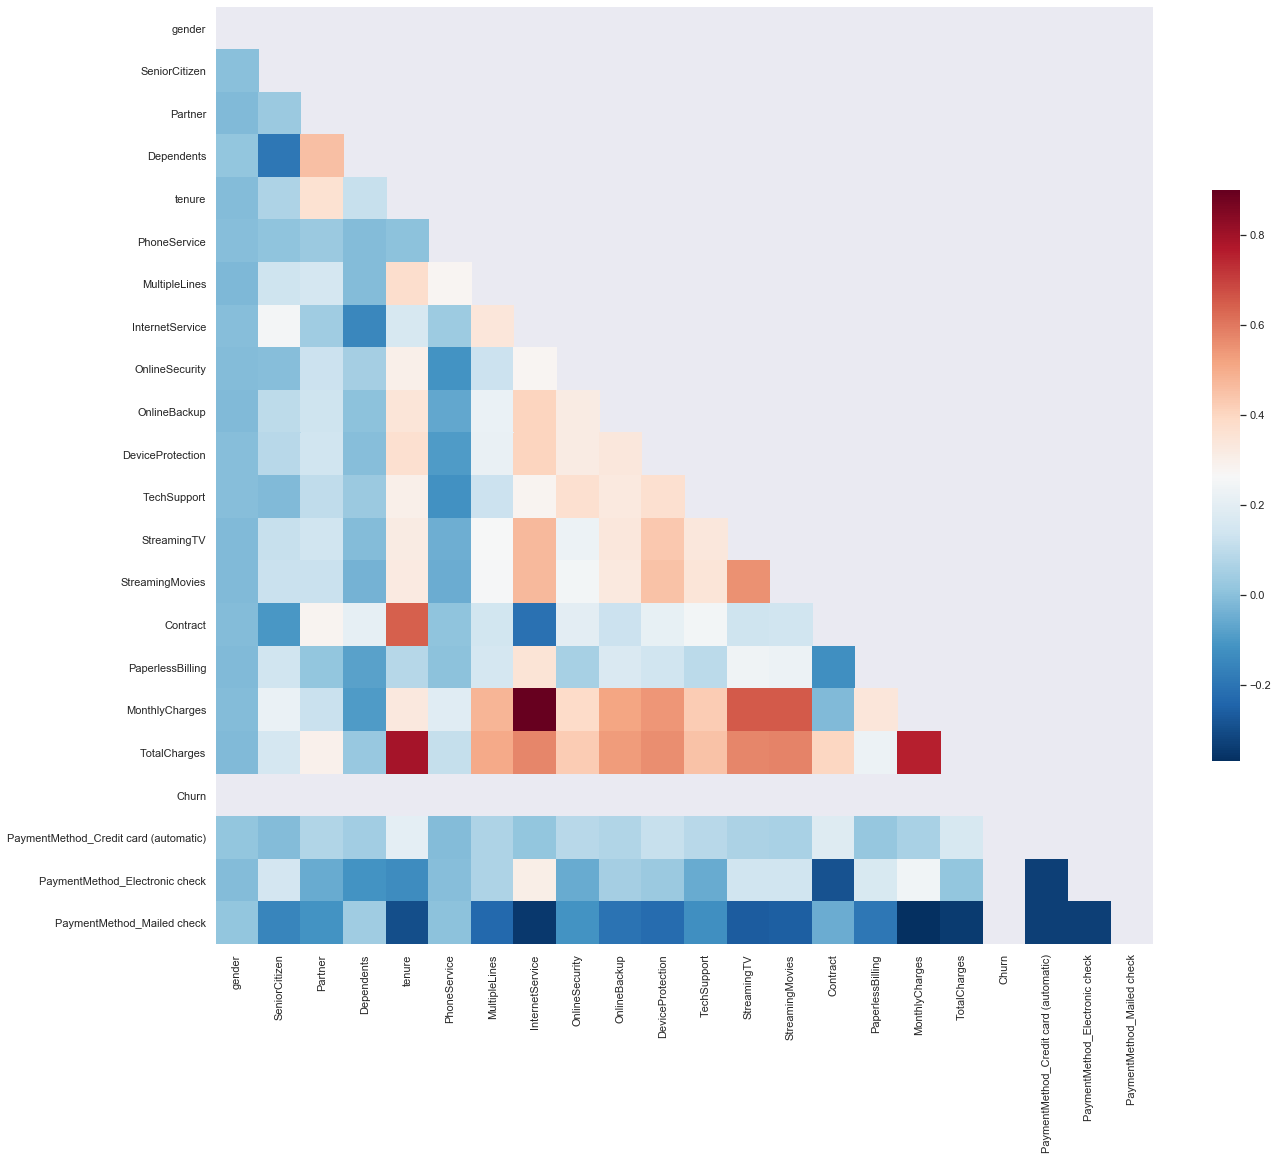

In [42]:
corrmat=no_churn.corr()
plt.subplots(figsize=(21,21))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, mask=mask, vmax=0.9, cmap="RdBu_r", square=True, cbar_kws={"shrink": .5})


### Look at Features that have a correlation greater than 55%

In [43]:
corr_matrix = df.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.55)]

In [44]:
to_drop

['Contract', 'MonthlyCharges', 'TotalCharges']

## Check for Class Imbalance

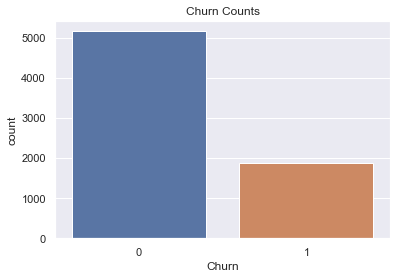

0    5163
1    1869
Name: Churn, dtype: int64

In [45]:
sns.countplot('Churn', data=df)
plt.title('Churn Counts')
plt.show()
pd.value_counts(df['Churn'])

In [46]:
max_size = churn['Churn'].value_counts().max()
max_size

1869

In [47]:
max_sizes = no_churn['Churn'].value_counts().max()
max_sizes

5163

## Resample

In [48]:
from sklearn.utils import resample
no_churn = resample(no_churn, n_samples = 4000, random_state=1)
churn = resample(churn, n_samples = 4000, random_state=1)
max_sizes = no_churn['Churn'].value_counts().max()
max_sizes

4000

In [49]:
from sklearn.utils import resample
#no_churn = no_churn.sample(n=3000)

In [50]:
no_churn.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000,4000.000
mean,0.492,0.118,0.529,0.344,37.418,0.905,0.404,1.089,0.343,0.373,0.367,0.349,0.372,0.373,0.880,0.536,61.902,2551.817,0.000,0.250,0.247,0.262
std,0.500,0.322,0.499,0.475,23.960,0.293,0.491,0.781,0.475,0.484,0.482,0.477,0.483,0.484,0.848,0.499,30.903,2317.488,0.000,0.433,0.431,0.440
min,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.700,18.900,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,15.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,25.238,587.100,0.000,0.000,0.000,0.000
50%,0.000,0.000,1.000,0.000,38.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,65.175,1699.725,0.000,0.000,0.000,0.000
75%,1.000,0.000,1.000,1.000,60.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,88.612,4196.200,0.000,1.000,0.000,1.000
max,1.000,1.000,1.000,1.000,72.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,118.750,8672.450,0.000,1.000,1.000,1.000


In [51]:
churned = pd.concat([churn, no_churn])

1    4000
0    4000
Name: Churn, dtype: int64

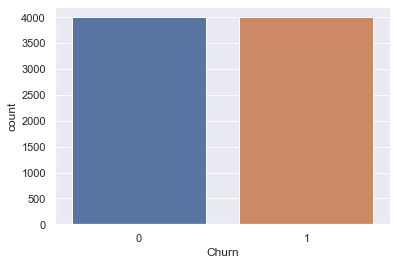

In [52]:
sns.countplot('Churn', data=churned)
churned.Churn.value_counts()

In [53]:
churned.describe()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000,8000.000
mean,0.489,0.192,0.447,0.261,27.650,0.908,0.426,1.361,0.252,0.323,0.327,0.253,0.395,0.403,0.507,0.641,68.020,2036.030,0.500,0.188,0.411,0.215
std,0.500,0.394,0.497,0.439,23.965,0.289,0.495,0.745,0.434,0.468,0.469,0.435,0.489,0.491,0.763,0.480,28.501,2178.793,0.500,0.391,0.492,0.411
min,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.700,18.850,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,5.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,45.850,270.137,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,21.000,1.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,74.650,1144.550,0.500,0.000,0.000,0.000
75%,1.000,0.000,1.000,1.000,49.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,90.550,3250.837,1.000,0.000,1.000,0.000
max,1.000,1.000,1.000,1.000,72.000,1.000,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000,1.000,118.750,8684.800,1.000,1.000,1.000,1.000


## Split Data into Class/Training Groups
#### Drop Features with High Correlation

In [54]:
# Split data into classes and training groups.
X = churned.drop(['customerID', 'TotalCharges', 'Churn', 'InternetService', 
'PaymentMethod_Mailed check', 'PaymentMethod_Mailed check', 
'Contract', 'Dependents','MultipleLines', 'OnlineBackup', 'StreamingTV'], 1)
y = churned.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
len(X_train)

6000

### Check for more uniform Histogram using Log

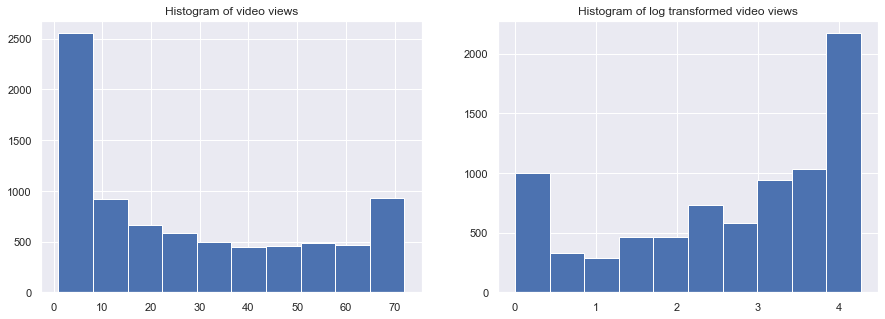

In [55]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(X["tenure"])
plt.title("Histogram of video views")

plt.subplot(1,2,2)
plt.hist(np.log(X["tenure"]))
plt.title("Histogram of log transformed video views")
plt.show()

## Heatmap of Correlation Matrix (After Dropped Features)

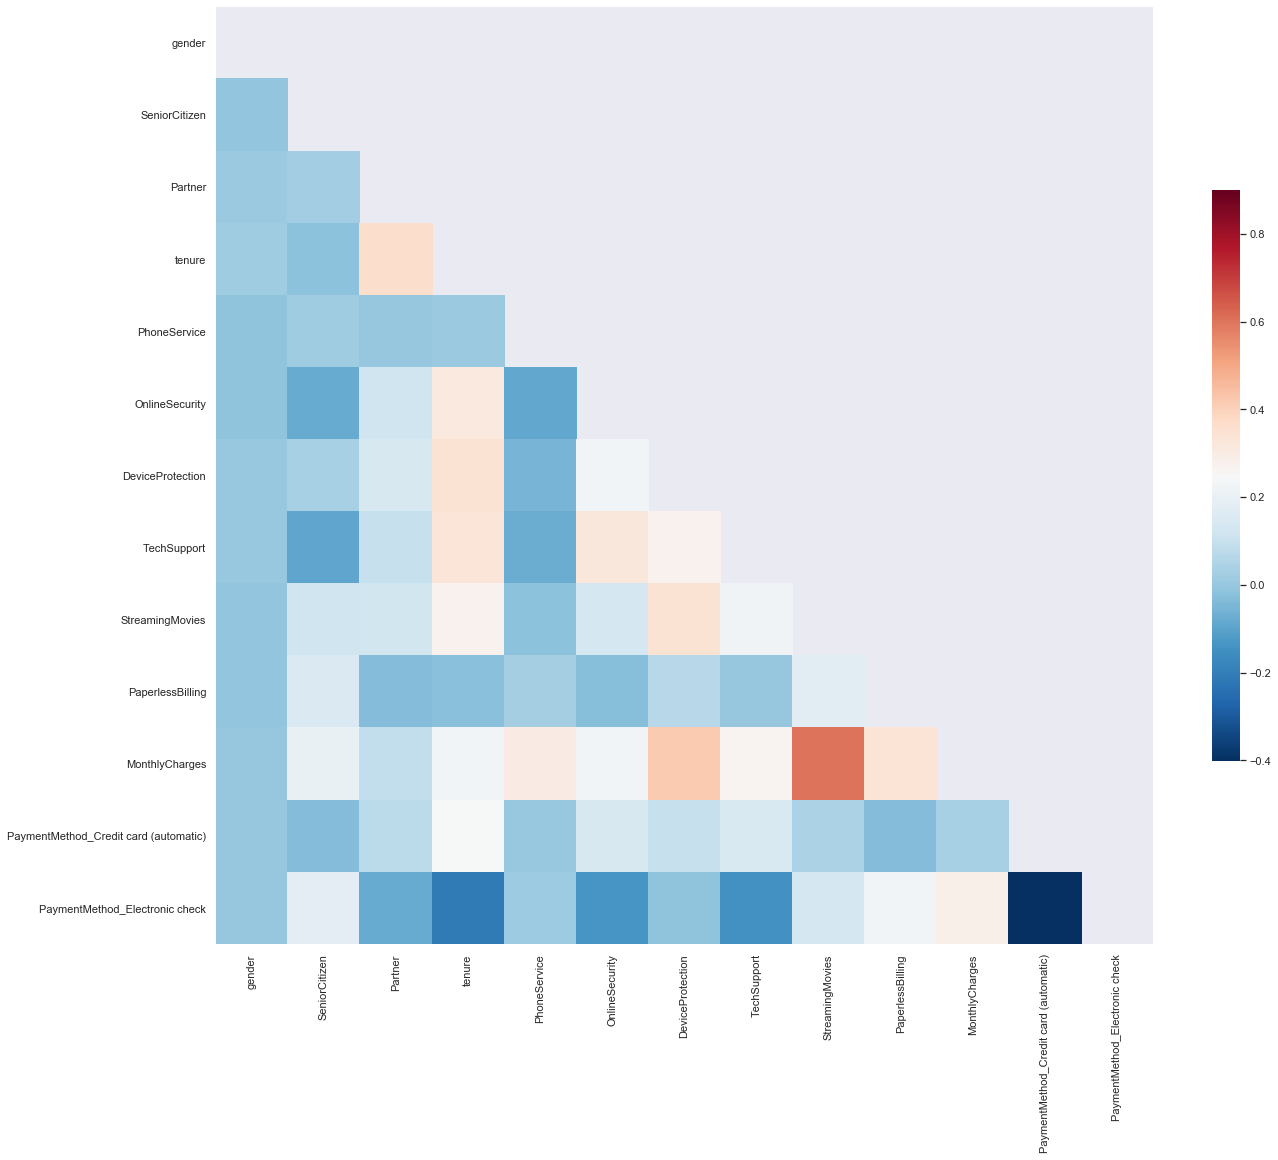

In [56]:
corrmat=X.corr()
plt.subplots(figsize=(21,21))
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat, mask=mask, vmax=0.9, cmap="RdBu_r", square=True, cbar_kws={"shrink": .5})

In [57]:
df.groupby("Churn").mean()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,,,,,,,,,,,,,,,,,,,,,
0,0.507,0.129,0.528,0.343,37.650,0.901,0.410,1.076,0.333,0.368,0.363,0.335,0.366,0.371,0.887,0.536,61.307,2555.344,0.250,0.251,0.251
1,0.498,0.255,0.358,0.174,17.979,0.909,0.455,1.633,0.158,0.280,0.292,0.166,0.436,0.438,0.140,0.749,74.441,1531.796,0.124,0.573,0.165


# Feature Selection
## Principal Component Analysis (PCA)

In [58]:
# Standardizing the features
x_stand = StandardScaler().fit_transform(X)

# PCA to keep 95% of variance
pca = PCA(0.95)

# Components required to keep 95% of variance
x_pca = pca.fit_transform(x_stand)

# Cumulative sum of explained variance by the components
var_cumsum=pca.explained_variance_ratio_.cumsum()
print(var_cumsum)
print('\n')
print('Need to keep {} components to explain 95% of the variance.'.format(len(var_cumsum)))

[0.20800369 0.36107094 0.44791697 0.52763976 0.60459549 0.67988793
 0.74270201 0.80272698 0.85354529 0.90276216 0.94386822 0.98291785]


Need to keep 12 components to explain 95% of the variance.


<Figure size 432x432 with 0 Axes>

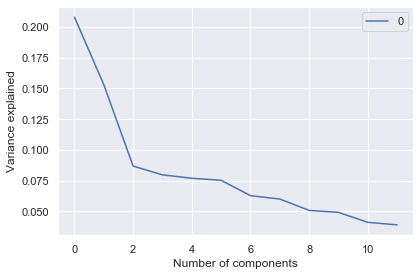

In [59]:
# Scree plot
plt.figure(figsize=(6,6))
pd.DataFrame(list(pca.explained_variance_ratio_)).plot(kind='line')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')

plt.tight_layout()
plt.show()

## Naive Bayes

In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
# Run Naive Bayes
gnb = GaussianNB()
# Fit the model
gnb.fit(X_train, y_train)
# Cross Validation
score = cross_val_score(gnb, X, y, cv=5)
# Report
print('Cross_Val_Score: {}'.format(score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Cross_Val_Score: [0.743125 0.73     0.72     0.739375 0.744375]
Unweighted Accuracy: 0.74 (+/- 0.02)


## K-Nearest Neighbors
#### Base Model

In [61]:
from sklearn.neighbors import KNeighborsClassifier
# Run KNN
neigh = KNeighborsClassifier(n_neighbors=3)
# Fit the model
neigh.fit(X_train, y_train)
# Cross Validation
knn_score = cross_val_score(neigh, X, y, cv=10)
# Report
print('Cross_Val_Score: {}'.format(knn_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (knn_score.mean(), knn_score.std() * 2))

Cross_Val_Score: [0.8475  0.82    0.8275  0.81125 0.82375 0.79125 0.845   0.84625 0.85
 0.805  ]
Unweighted Accuracy: 0.83 (+/- 0.04)


## KNN Parameter Tuning
#### Randomized Search

In [131]:
from sklearn.model_selection import RandomizedSearchCV
# Number of neighbors to consider for KNN
n_neighbors = [2, 5, 10]
# Power parameter for Minkowski metric
p = [1,2,5,10]

# Create the random grid
random_grid = {'n_neighbors': n_neighbors,
               'p': p}
print(random_grid)

{'n_neighbors': [2, 5, 10], 'p': [1, 2, 5, 10]}


#### 3 Fold Cross Validation

In [132]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
neighbors = RandomizedSearchCV(estimator = neigh, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
neighbors.fit(X, y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   11.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=3,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'n_neighbors': [2, 5, 10],
                                        'p': [1, 2, 5, 10]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

## Print and Run Best Parameters for KNN

In [133]:
neighbors.best_params_

{'p': 5, 'n_neighbors': 2}

In [134]:
from sklearn.neighbors import KNeighborsClassifier
# Run KNN
neigh = KNeighborsClassifier(n_neighbors=2, p = 5)
# Fit the model
neigh.fit(X_train, y_train)
# Cross Validation
knn_score = cross_val_score(neigh, X, y, cv=10)
# Report
print('Cross_Val_Score: {}'.format(knn_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (knn_score.mean(), knn_score.std() * 2))

Cross_Val_Score: [0.875   0.845   0.87625 0.835   0.85125 0.8425  0.85875 0.865   0.8275
 0.84875]
Unweighted Accuracy: 0.85 (+/- 0.03)


## Decision Tree Classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
# Run Decision Tree
clf = DecisionTreeClassifier(random_state=0)
# Cross Validation
dt_score = cross_val_score(clf, X, y, cv=10)
# Report
print('Cross_Val_Score: {}'.format(dt_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (dt_score.mean(), dt_score.std() * 2))

Cross_Val_Score: [0.9275  0.91125 0.90625 0.9025  0.91    0.89875 0.925   0.91125 0.8925
 0.9125 ]
Unweighted Accuracy: 0.91 (+/- 0.02)


## Random Forest Classifier
#### Base Model

In [63]:
from sklearn.ensemble import RandomForestClassifier
# Run Random Forest
rf = RandomForestClassifier(n_estimators=10)
# Fit the model
rf = rf.fit(X_train, y_train)
# Cross Validation
rf_score = cross_val_score(rf, X, y, cv=10)
# Report
print('Cross_Val_Score: {}'.format(rf_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (rf_score.mean(), rf_score.std() * 2))

Cross_Val_Score: [0.93    0.91125 0.91125 0.90625 0.91625 0.905   0.9225  0.92625 0.895
 0.9025 ]
Unweighted Accuracy: 0.91 (+/- 0.02)


## Random Forest Parameter Tuning
#### Randomized Search

In [64]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


#### 3 Fold Cross Validation

In [119]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

## Print and Run Best Parameters for Random Forest

In [66]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [72]:
from sklearn.ensemble import RandomForestClassifier
# Run Random Forest with Parameters and compare base model and random seach model
rf = RandomForestClassifier(n_estimators= 1000,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 20,
 bootstrap= True)
# Fit the model
rf = rf.fit(X_train, y_train)
# Cross Validation
rf_score = cross_val_score(rf, X, y, cv=10)
print('Cross_Val_Score: {}'.format(rf_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (rf_score.mean(), rf_score.std() * 2))

Cross_Val_Score: [0.935   0.915   0.92625 0.91    0.925   0.915   0.94125 0.9325  0.91125
 0.915  ]
Unweighted Accuracy: 0.92 (+/- 0.02)


## Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
#Run Logistic Regression
lr = LogisticRegression(random_state=0)
#Fit the model
lr = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predicts = lr.predict_proba(X_test)
#Cross Validation
lr_score = cross_val_score(lr, X, y, cv=10)
print('Cross_Val_Score: {}'.format(lr_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (lr_score.mean(), lr_score.std() * 2))

Cross_Val_Score: [0.7675  0.7475  0.7625  0.74    0.7475  0.77125 0.78375 0.7575  0.7875
 0.74875]
Unweighted Accuracy: 0.76 (+/- 0.03)


## Support Vector Machine

In [69]:
# Run Support Vector Machine
sv = LinearSVC()
# Fit the Model
sv.fit(X_train, y_train)
sv_predict = sv.predict(X_test)
# Cross Validation
sv_score = cross_val_score(sv, X, y, cv=10)
print('Cross_Val_Score: {}'.format(sv_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (sv_score.mean(), sv_score.std() * 2))

Cross_Val_Score: [0.64875 0.6475  0.5375  0.705   0.74875 0.76625 0.50875 0.7425  0.6275
 0.7375 ]
Unweighted Accuracy: 0.67 (+/- 0.17)


## Gradient Boosting

#### Base Model

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
# Run Gradient Boost
gbc = GradientBoostingClassifier()
# Fit the Model
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
# Cross Validation
gbc_score = cross_val_score(gbc, X, y, cv=10)
print('Cross_Val_Score: {}'.format(gbc_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (gbc_score.mean(), gbc_score.std() * 2))


Cross_Val_Score: [0.7925  0.76125 0.7925  0.74875 0.78125 0.77875 0.78625 0.7875  0.8
 0.755  ]
Unweighted Accuracy: 0.78 (+/- 0.03)


## Gradient Boosting Parameter Tuning 
#### Randomized Search

In [135]:
from sklearn.model_selection import RandomizedSearchCV
# Number of boosting stages
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider
max_features = ['auto', 'sqrt']
# Maximum number of individual regression estimators
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


#### 3 Fold Cross Validation

In [136]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gradientb = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gradientb.fit(X, y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 22.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

## Print and Run Best Parameters for Gradient Boost

In [137]:
gradientb.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [138]:
from sklearn.ensemble import GradientBoostingClassifier
#Run Gradient Boost
gbc = GradientBoostingClassifier(n_estimators = 800, min_samples_split = 2,
                                min_samples_leaf = 1, max_features = 'sqrt',
                                max_depth = None)
# Fit the Model
gbc.fit(X_train, y_train)
gbc_predict = gbc.predict(X_test)
# Cross Validation
gbc_score = cross_val_score(gbc, X, y, cv=10)
print('Cross_Val_Score: {}'.format(gbc_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (gbc_score.mean(), gbc_score.std() * 2))

Cross_Val_Score: [0.94125 0.93125 0.925   0.91125 0.92875 0.93125 0.9425  0.93375 0.92125
 0.91375]
Unweighted Accuracy: 0.93 (+/- 0.02)


## Summary of Models

In [74]:
print("Naive Bayes Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print("KNN Unweighted Accuracy: %0.2f (+/- %0.2f)" % (knn_score.mean(), knn_score.std() * 2))
print("Decision Tree Unweighted Accuracy: %0.2f (+/- %0.2f)" % (dt_score.mean(), dt_score.std() * 2))
print("Random ForestUnweighted Accuracy: %0.2f (+/- %0.2f)" % (rf_score.mean(), rf_score.std() * 2))
print("Logistic Regression Unweighted Accuracy: %0.2f (+/- %0.2f)" % (lr_score.mean(), lr_score.std() * 2))
print("SVM Unweighted Accuracy: %0.2f (+/- %0.2f)" % (sv_score.mean(), sv_score.std() * 2))
print("Gradient Boosting Unweighted Accuracy: %0.2f (+/- %0.2f)" % (gbc_score.mean(), gbc_score.std() * 2))


Naive Bayes Unweighted Accuracy: 0.74 (+/- 0.02)
KNN Unweighted Accuracy: 0.83 (+/- 0.04)
Decision Tree Unweighted Accuracy: 0.91 (+/- 0.02)
Random ForestUnweighted Accuracy: 0.92 (+/- 0.02)
Logistic Regression Unweighted Accuracy: 0.76 (+/- 0.03)
SVM Unweighted Accuracy: 0.67 (+/- 0.17)
Gradient Boosting Unweighted Accuracy: 0.78 (+/- 0.03)


## Summary of Models Dropping Different Features

In [75]:
#Dropped: 'customerID', 'TotalCharges', 'Churn', 'InternetService',
#'PaymentMethod_Mailed check', 'Contract', 'Dependents', 
#'MultipleLines', 'OnlineBackup', 'StreamingTV'

'''Naive Bayes Unweighted Accuracy: 0.74 (+/- 0.02)
KNN Unweighted Accuracy: 0.83 (+/- 0.04)
Decision Tree Unweighted Accuracy: 0.91 (+/- 0.02)
Random ForestUnweighted Accuracy: 0.92 (+/- 0.02)
Logistic Regression Unweighted Accuracy: 0.76 (+/- 0.03)
SVM Unweighted Accuracy: 0.68 (+/- 0.11)
Gradient Boosting Unweighted Accuracy: 0.78 (+/- 0.03)'''

'Naive Bayes Unweighted Accuracy: 0.74 (+/- 0.02)\nKNN Unweighted Accuracy: 0.83 (+/- 0.04)\nDecision Tree Unweighted Accuracy: 0.91 (+/- 0.02)\nRandom ForestUnweighted Accuracy: 0.92 (+/- 0.02)\nLogistic Regression Unweighted Accuracy: 0.76 (+/- 0.03)\nSVM Unweighted Accuracy: 0.68 (+/- 0.11)\nGradient Boosting Unweighted Accuracy: 0.78 (+/- 0.03)'

In [76]:
#Dropped: 'customerID', 'TotalCharges', 'Churn', 
#'InternetService', 'PaymentMethod_Mailed check', 'Contract'

'''Naive Bayes Unweighted Accuracy: 0.72 (+/- 0.02)
KNN Unweighted Accuracy: 0.83 (+/- 0.03)
Decision Tree Unweighted Accuracy: 0.91 (+/- 0.03)
Random ForestUnweighted Accuracy: 0.92 (+/- 0.02)
Logistic Regression Unweighted Accuracy: 0.76 (+/- 0.03)
SVM Unweighted Accuracy: 0.63 (+/- 0.20)
Gradient Boosting Unweighted Accuracy: 0.78 (+/- 0.04)'''

'Naive Bayes Unweighted Accuracy: 0.72 (+/- 0.02)\nKNN Unweighted Accuracy: 0.83 (+/- 0.03)\nDecision Tree Unweighted Accuracy: 0.91 (+/- 0.03)\nRandom ForestUnweighted Accuracy: 0.92 (+/- 0.02)\nLogistic Regression Unweighted Accuracy: 0.76 (+/- 0.03)\nSVM Unweighted Accuracy: 0.63 (+/- 0.20)\nGradient Boosting Unweighted Accuracy: 0.78 (+/- 0.04)'

In [77]:
# Dropped:'customerID', 'TotalCharges', 'Churn', 'InternetService', 
#'PaymentMethod_Mailed check', 'PaymentMethod_Mailed check', 
#'Contract', 'Dependents','tenure', 'MultipleLines', 'OnlineBackup', 
#'StreamingTV' @3000


'''Naive Bayes Unweighted Accuracy: 0.71 (+/- 0.03)
KNN Unweighted Accuracy: 0.77 (+/- 0.04)
Decision Tree Unweighted Accuracy: 0.85 (+/- 0.03)
Random ForestUnweighted Accuracy: 0.85 (+/- 0.03)
Logistic Regression Unweighted Accuracy: 0.73 (+/- 0.02)
SVM Unweighted Accuracy: 0.64 (+/- 0.12)
Gradient Boosting Unweighted Accuracy: 0.75 (+/- 0.03)'''

'Naive Bayes Unweighted Accuracy: 0.71 (+/- 0.03)\nKNN Unweighted Accuracy: 0.77 (+/- 0.04)\nDecision Tree Unweighted Accuracy: 0.85 (+/- 0.03)\nRandom ForestUnweighted Accuracy: 0.85 (+/- 0.03)\nLogistic Regression Unweighted Accuracy: 0.73 (+/- 0.02)\nSVM Unweighted Accuracy: 0.64 (+/- 0.12)\nGradient Boosting Unweighted Accuracy: 0.75 (+/- 0.03)'

In [78]:
#Dropped:'customerID', 'Churn', @3000

'''Naive Bayes Unweighted Accuracy: 0.76 (+/- 0.03)
KNN Unweighted Accuracy: 0.78 (+/- 0.03)
Decision Tree Unweighted Accuracy: 0.88 (+/- 0.03)
Random ForestUnweighted Accuracy: 0.90 (+/- 0.04)
Logistic Regression Unweighted Accuracy: 0.77 (+/- 0.04)
SVM Unweighted Accuracy: 0.62 (+/- 0.17)
Gradient Boosting Unweighted Accuracy: 0.79 (+/- 0.04)'''

'Naive Bayes Unweighted Accuracy: 0.76 (+/- 0.03)\nKNN Unweighted Accuracy: 0.78 (+/- 0.03)\nDecision Tree Unweighted Accuracy: 0.88 (+/- 0.03)\nRandom ForestUnweighted Accuracy: 0.90 (+/- 0.04)\nLogistic Regression Unweighted Accuracy: 0.77 (+/- 0.04)\nSVM Unweighted Accuracy: 0.62 (+/- 0.17)\nGradient Boosting Unweighted Accuracy: 0.79 (+/- 0.04)'

In [79]:
# Dropped:'customerID', 'Churn','PaymentMethod_Mailed check', 
# 'Contract'@3000

'''Naive Bayes Unweighted Accuracy: 0.74 (+/- 0.03)
KNN Unweighted Accuracy: 0.78 (+/- 0.02)
Decision Tree Unweighted Accuracy: 0.88 (+/- 0.03)
Random ForestUnweighted Accuracy: 0.89 (+/- 0.03)
Logistic Regression Unweighted Accuracy: 0.77 (+/- 0.04)
SVM Unweighted Accuracy: 0.71 (+/- 0.07)
Gradient Boosting Unweighted Accuracy: 0.79 (+/- 0.04)'''

'Naive Bayes Unweighted Accuracy: 0.74 (+/- 0.03)\nKNN Unweighted Accuracy: 0.78 (+/- 0.02)\nDecision Tree Unweighted Accuracy: 0.88 (+/- 0.03)\nRandom ForestUnweighted Accuracy: 0.89 (+/- 0.03)\nLogistic Regression Unweighted Accuracy: 0.77 (+/- 0.04)\nSVM Unweighted Accuracy: 0.71 (+/- 0.07)\nGradient Boosting Unweighted Accuracy: 0.79 (+/- 0.04)'

In [80]:
#'customerID', 'TotalCharges', 'Churn',
# 'PaymentMethod_Mailed check', 'Contract'@3000

'''Naive Bayes Unweighted Accuracy: 0.74 (+/- 0.02)
KNN Unweighted Accuracy: 0.80 (+/- 0.04)
Decision Tree Unweighted Accuracy: 0.87 (+/- 0.03)
Random ForestUnweighted Accuracy: 0.89 (+/- 0.03)
Logistic Regression Unweighted Accuracy: 0.76 (+/- 0.04)
SVM Unweighted Accuracy: 0.65 (+/- 0.17)
Gradient Boosting Unweighted Accuracy: 0.79 (+/- 0.05)'''

'Naive Bayes Unweighted Accuracy: 0.74 (+/- 0.02)\nKNN Unweighted Accuracy: 0.80 (+/- 0.04)\nDecision Tree Unweighted Accuracy: 0.87 (+/- 0.03)\nRandom ForestUnweighted Accuracy: 0.89 (+/- 0.03)\nLogistic Regression Unweighted Accuracy: 0.76 (+/- 0.04)\nSVM Unweighted Accuracy: 0.65 (+/- 0.17)\nGradient Boosting Unweighted Accuracy: 0.79 (+/- 0.05)'

In [81]:
#'customerID', 'TotalCharges', 'Churn', 'InternetService',
# 'PaymentMethod_Mailed check', 'Contract'@3000

'''Naive Bayes Unweighted Accuracy: 0.73 (+/- 0.02)
KNN Unweighted Accuracy: 0.80 (+/- 0.04)
Decision Tree Unweighted Accuracy: 0.88 (+/- 0.04)
Random ForestUnweighted Accuracy: 0.89 (+/- 0.02)
Logistic Regression Unweighted Accuracy: 0.76 (+/- 0.05)
SVM Unweighted Accuracy: 0.68 (+/- 0.15)
Gradient Boosting Unweighted Accuracy: 0.79 (+/- 0.05)'''

'Naive Bayes Unweighted Accuracy: 0.73 (+/- 0.02)\nKNN Unweighted Accuracy: 0.80 (+/- 0.04)\nDecision Tree Unweighted Accuracy: 0.88 (+/- 0.04)\nRandom ForestUnweighted Accuracy: 0.89 (+/- 0.02)\nLogistic Regression Unweighted Accuracy: 0.76 (+/- 0.05)\nSVM Unweighted Accuracy: 0.68 (+/- 0.15)\nGradient Boosting Unweighted Accuracy: 0.79 (+/- 0.05)'

In [82]:
#'customerID', 'MonthlyCharges', 'Churn', 'InternetService',
# 'PaymentMethod_Mailed check' @3000

'''Naive Bayes Unweighted Accuracy: 0.74 (+/- 0.03)
KNN Unweighted Accuracy: 0.78 (+/- 0.03)
Decision Tree Unweighted Accuracy: 0.88 (+/- 0.02)
Random ForestUnweighted Accuracy: 0.89 (+/- 0.03)
Logistic Regression Unweighted Accuracy: 0.76 (+/- 0.04)
SVM Unweighted Accuracy: 0.65 (+/- 0.15)
Gradient Boosting Unweighted Accuracy: 0.78 (+/- 0.04)'''

'Naive Bayes Unweighted Accuracy: 0.74 (+/- 0.03)\nKNN Unweighted Accuracy: 0.78 (+/- 0.03)\nDecision Tree Unweighted Accuracy: 0.88 (+/- 0.02)\nRandom ForestUnweighted Accuracy: 0.89 (+/- 0.03)\nLogistic Regression Unweighted Accuracy: 0.76 (+/- 0.04)\nSVM Unweighted Accuracy: 0.65 (+/- 0.15)\nGradient Boosting Unweighted Accuracy: 0.78 (+/- 0.04)'

In [83]:
#'customerID', 'TotalCharges', 'Churn', 'InternetService',
# 'PaymentMethod_Mailed check' @3000
'''Naive Bayes Unweighted Accuracy: 0.75 (+/- 0.03)
KNN Unweighted Accuracy: 0.80 (+/- 0.04)
Decision Tree Unweighted Accuracy: 0.88 (+/- 0.03)
Random ForestUnweighted Accuracy: 0.89 (+/- 0.03)
Logistic Regression Unweighted Accuracy: 0.77 (+/- 0.04)
SVM Unweighted Accuracy: 0.68 (+/- 0.17)
Gradient Boosting Unweighted Accuracy: 0.79 (+/- 0.04)'''

'Naive Bayes Unweighted Accuracy: 0.75 (+/- 0.03)\nKNN Unweighted Accuracy: 0.80 (+/- 0.04)\nDecision Tree Unweighted Accuracy: 0.88 (+/- 0.03)\nRandom ForestUnweighted Accuracy: 0.89 (+/- 0.03)\nLogistic Regression Unweighted Accuracy: 0.77 (+/- 0.04)\nSVM Unweighted Accuracy: 0.68 (+/- 0.17)\nGradient Boosting Unweighted Accuracy: 0.79 (+/- 0.04)'

In [84]:
#'customerID', 'TotalCharges', 'Churn', 'InternetService',
# 'PaymentMethod_Mailed check' @3500
'''Naive Bayes Unweighted Accuracy: 0.75 (+/- 0.02)
KNN Unweighted Accuracy: 0.82 (+/- 0.03)
Decision Tree Unweighted Accuracy: 0.90 (+/- 0.02)
Random ForestUnweighted Accuracy: 0.91 (+/- 0.02)
Logistic Regression Unweighted Accuracy: 0.77 (+/- 0.03)
SVM Unweighted Accuracy: 0.69 (+/- 0.17)
Gradient Boosting Unweighted Accuracy: 0.79 (+/- 0.03)'''

'Naive Bayes Unweighted Accuracy: 0.75 (+/- 0.02)\nKNN Unweighted Accuracy: 0.82 (+/- 0.03)\nDecision Tree Unweighted Accuracy: 0.90 (+/- 0.02)\nRandom ForestUnweighted Accuracy: 0.91 (+/- 0.02)\nLogistic Regression Unweighted Accuracy: 0.77 (+/- 0.03)\nSVM Unweighted Accuracy: 0.69 (+/- 0.17)\nGradient Boosting Unweighted Accuracy: 0.79 (+/- 0.03)'

In [85]:
#'customerID', 'TotalCharges', 'Churn', 'InternetService',
# 'PaymentMethod_Mailed check' @4k
'''Naive Bayes Unweighted Accuracy: 0.75 (+/- 0.01)
KNN Unweighted Accuracy: 0.83 (+/- 0.03)
Decision Tree Unweighted Accuracy: 0.91 (+/- 0.02)
Random ForestUnweighted Accuracy: 0.92 (+/- 0.02)
Logistic Regression Unweighted Accuracy: 0.77 (+/- 0.03)
SVM Unweighted Accuracy: 0.67 (+/- 0.17)
Gradient Boosting Unweighted Accuracy: 0.79 (+/- 0.03)'''

'Naive Bayes Unweighted Accuracy: 0.75 (+/- 0.01)\nKNN Unweighted Accuracy: 0.83 (+/- 0.03)\nDecision Tree Unweighted Accuracy: 0.91 (+/- 0.02)\nRandom ForestUnweighted Accuracy: 0.92 (+/- 0.02)\nLogistic Regression Unweighted Accuracy: 0.77 (+/- 0.03)\nSVM Unweighted Accuracy: 0.67 (+/- 0.17)\nGradient Boosting Unweighted Accuracy: 0.79 (+/- 0.03)'

## K Best Features

In [86]:
# Import tools.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Create and fit selector
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)

X_skbest = selector.transform(X)
print(X_skbest.shape)

X.columns[selector.get_support(indices=True)].tolist()
#Explaining variance in Data.

(8000, 10)


['SeniorCitizen',
 'Partner',
 'tenure',
 'OnlineSecurity',
 'DeviceProtection',
 'TechSupport',
 'PaperlessBilling',
 'MonthlyCharges',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check']

## Random Forest with K Best

In [87]:
# Run Random Forest model with SelectKBest.
rf.fit(X_skbest, y)
y_pred_rf = rf.predict(X_skbest)
rf_score_skbest = cross_val_score(rf, X_skbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(rf_score_skbest))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    rf_score_skbest.mean()))

Cross-Validation Scores: [0.9325  0.92125 0.93125 0.89375 0.925   0.91875 0.93625 0.92125 0.91
 0.92   ]
Averaged Cross-Validation Scores: 92.10%.


## SVC with K Best

In [88]:
# Run SVC model with SelectKBest.
sv.fit(X_skbest, y)
y_pred_sv = sv.predict(X_skbest)
sv_score_skbest = cross_val_score(sv, X_skbest, y, cv=10)
print('Cross-Validation Scores: {}'.format(sv_score_skbest))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    sv_score_skbest.mean()))

Cross-Validation Scores: [0.7475  0.6325  0.7525  0.5225  0.7475  0.54    0.53125 0.7525  0.76625
 0.58875]
Averaged Cross-Validation Scores: 65.81%.


## Principal Component Analysis

In [89]:
# Scaling data.
sc = StandardScaler()
X = sc.fit_transform(X)

# Set up PCA.
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

# Resplit training sets.
X_pca_train, X_pca_test, y_train, y_test = train_test_split(
    X_pca, y, random_state=15)

print('Percentage of total variance explained by each component:\n',
      pca.explained_variance_ratio_)

Percentage of total variance explained by each component:
 [0.20800369 0.15306725 0.08684603 0.07972279 0.07695574 0.07529244
 0.06281408 0.06002497 0.05081832 0.04921686]


## Naive Bayes with PCA

In [90]:
# Run Naive Bayes model with PCA.
gnb_pca = GaussianNB()
# Fit the model.
gnb_pca.fit(X_pca_train, y_train)
print(gnb_pca)
y_pred_gnb = gnb_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gnb)
# Cross-validation.
gnb_pca_score = cross_val_score(gnb_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(gnb_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    gnb_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gnb))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gnb))

GaussianNB(priors=None, var_smoothing=1e-09)
Cross-Validation Scores: [0.73    0.745   0.74125 0.72625 0.72    0.73    0.755   0.725   0.77375
 0.73875]
Averaged Cross-Validation Scores: 73.85%.
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       974
           1       0.75      0.74      0.74      1026

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

[[728 246]
 [271 755]]


## KNN with PCA

In [91]:
# Run K-Nearest Neighbors model with PCA.
knn_pca = neighbors.KNeighborsClassifier()
# Fit the model.
knn_pca.fit(X_pca_train, y_train)
print(knn_pca)
y_pred_knn_pca = knn_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_knn_pca)
# Cross-validation.
knn_pca_score = cross_val_score(knn_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(knn_pca_score.mean()))
print('Averaged Cross-Validation Scores: {:.2%}.'.
      format(knn_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_knn_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_knn_pca))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Cross-Validation Scores: 0.7841249999999998
Averaged Cross-Validation Scores: 78.41%.
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       974
           1       0.76      0.81      0.79      1026

    accuracy                           0.78      2000
   macro avg       0.78      0.77      0.77      2000
weighted avg       0.78      0.78      0.78      2000

[[715 259]
 [190 836]]


## Decision Tree with PCA

In [92]:
# Run Decision Tree model with PCA.
from sklearn import tree
dtc_pca = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state=15
)
# Fit the model.
dtc_pca.fit(X_pca_train, y_train)
print(dtc_pca)
y_pred_dtc_pca = dtc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_dtc_pca)
# Cross-validation.
dtc_pca_score = cross_val_score(dtc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(dtc_pca_score.mean()))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    dtc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_dtc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_dtc_pca))


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=15, splitter='best')
Cross-Validation Scores: 0.5945
Averaged Cross-Validation Scores: 59.45%.
              precision    recall  f1-score   support

           0       0.58      0.69      0.63       974
           1       0.64      0.53      0.58      1026

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.61      0.61      0.61      2000

[[671 303]
 [480 546]]


## Random Forest with PCA

In [93]:
# Run Random Forest model with PCA.
rfc_pca = RandomForestClassifier()
# Fit the model.
rfc_pca.fit(X_pca_train, y_train)
print(rfc_pca)
y_pred_rfc_pca = rfc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_rfc_pca)
# Cross-validation.
rfc_pca_score = cross_val_score(rfc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(rfc_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_rfc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_rfc_pca))


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Cross-Validation Scores: [0.93125 0.92    0.90625 0.90625 0.91375 0.91625 0.9325  0.92    0.8975
 0.90375]
Averaged Cross-Validation Scores: 91.48%.
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       974
           1       0.88      0.92      0.90      1026

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.9

## Logisitic Regression with PCA

In [94]:
# Run Logistic Regression model with PCA.
lr_pca = LogisticRegression(solver='lbfgs')
# Fit the model.
lr_pca.fit(X_pca_train, y_train)
print(lr_pca)
y_pred_lr_pca = lr_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_lr_pca)
# Cross-validation.
lr_pca_score = cross_val_score(lr_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(lr_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(lr_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_lr_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_lr_pca))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Cross-Validation Scores: [0.72125 0.72625 0.74125 0.7225  0.71375 0.74375 0.75125 0.735   0.7625
 0.7275 ]
Averaged Cross-Validation Scores: 73.45%.
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       974
           1       0.75      0.73      0.74      1026

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

[[729 245]
 [275 751]]


## Linear SVC with PCA

In [95]:

# Run LinearSVC model with PCA.
svc_pca = LinearSVC(max_iter=8000)
# Fit the model.
svc_pca.fit(X_pca_train, y_train)
print(svc_pca)
y_pred_svc_pca = svc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_svc_pca)
# Cross-validation.
svc_pca_score = cross_val_score(svc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(svc_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    svc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_svc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_svc_pca))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=8000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
Cross-Validation Scores: [0.72375 0.7275  0.74375 0.72625 0.7125  0.74125 0.74875 0.735   0.76375
 0.7275 ]
Averaged Cross-Validation Scores: 73.50%.
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       974
           1       0.75      0.73      0.74      1026

    accuracy                           0.74      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.74      0.74      0.74      2000

[[729 245]
 [276 750]]


## Gradient Boosting with PCA

In [96]:
# Run Gradient Boosting model with PCA.
gbc_pca = ensemble.GradientBoostingClassifier()
# Fit the model.
gbc_pca.fit(X_pca_train, y_train)
print(gbc_pca)
y_pred_gbc_pca = gbc_pca.predict(X_pca_test)
# Accuracy score.
accuracy_score(y_test, y_pred_gbc_pca)
# Cross-validation.
gbc_pca_score = cross_val_score(gbc_pca, X_pca, y, cv=10)
print('Cross-Validation Scores: {}'.format(gbc_pca_score))
print('Averaged Cross-Validation Scores: {:.2%}.'.format(
    gbc_pca_score.mean()))
# Classification report.
print(classification_report(y_test, y_pred_gbc_pca))
# Confusion matrix.
print(confusion_matrix(y_test, y_pred_gbc_pca))

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Cross-Validation Scores: [0.79125 0.77875 0.77375 0.78625 0.7575  0.7875  0.80375 0.7875  0.78375
 0.77125]
Averaged Cross-Validation Scores: 78.21%.
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       974
           1       0.77      0.82      0.79 

## Summary of Models with PCA
Not a significant difference than withough PCA

In [97]:
print('Naive Bayes PCA Averaged Cross-Validation Scores: {:.2%}.'.format(
    gnb_pca_score.mean()))
print('K-Nearest Neighbors PCA Averaged Cross-Validation Scores: {:.2%}.'
      .format(knn_pca_score.mean()))
print('Decision Tree PCA Averaged Cross-Validation Scores: {:.2%}.'.format(
    dtc_pca_score.mean()))
print('Random Forest PCA Averaged Cross-Validation Scores: {:.2%}.'.format(
    rfc_pca_score.mean()))
print('Logistic Regression PCA Averaged Cross-Validation Scores: {:.2%}.'
      .format(lr_pca_score.mean()))
print('Linear Support Vector PCA Averaged Cross-Validation Score: {:.2%}.'
      .format(svc_pca_score.mean()))
print('Gradient Boosting PCA Averaged Cross-Validation Score: {:.2%}.'.format(
    gbc_pca_score.mean()))

Naive Bayes PCA Averaged Cross-Validation Scores: 73.85%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 78.41%.
Decision Tree PCA Averaged Cross-Validation Scores: 59.45%.
Random Forest PCA Averaged Cross-Validation Scores: 91.48%.
Logistic Regression PCA Averaged Cross-Validation Scores: 73.45%.
Linear Support Vector PCA Averaged Cross-Validation Score: 73.50%.
Gradient Boosting PCA Averaged Cross-Validation Score: 78.21%.


In [98]:
#n_components = 1
#of sig features. Melted features.
#translate to something with less correlation.
'''Naive Bayes PCA Averaged Cross-Validation Scores: 58.27%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 66.80%.
Decision Tree PCA Averaged Cross-Validation Scores: 57.83%.
Random Forest PCA Averaged Cross-Validation Scores: 84.44%.
Logistic Regression PCA Averaged Cross-Validation Scores: 56.80%.
Linear Support Vector PCA Averaged Cross-Validation Score: 56.84%.
Gradient Boosting PCA Averaged Cross-Validation Score: 61.24%.'''

'Naive Bayes PCA Averaged Cross-Validation Scores: 58.27%.\nK-Nearest Neighbors PCA Averaged Cross-Validation Scores: 66.80%.\nDecision Tree PCA Averaged Cross-Validation Scores: 57.83%.\nRandom Forest PCA Averaged Cross-Validation Scores: 84.44%.\nLogistic Regression PCA Averaged Cross-Validation Scores: 56.80%.\nLinear Support Vector PCA Averaged Cross-Validation Score: 56.84%.\nGradient Boosting PCA Averaged Cross-Validation Score: 61.24%.'

In [99]:
#n_components = 2
'''Naive Bayes PCA Averaged Cross-Validation Scores: 74.13%.
K-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.79%.
Decision Tree PCA Averaged Cross-Validation Scores: 72.89%.
Random Forest PCA Averaged Cross-Validation Scores: 90.00%.
Logistic Regression PCA Averaged Cross-Validation Scores: 73.86%.
Linear Support Vector PCA Averaged Cross-Validation Score: 73.89%.
Gradient Boosting PCA Averaged Cross-Validation Score: 75.80%.'''

'Naive Bayes PCA Averaged Cross-Validation Scores: 74.13%.\nK-Nearest Neighbors PCA Averaged Cross-Validation Scores: 77.79%.\nDecision Tree PCA Averaged Cross-Validation Scores: 72.89%.\nRandom Forest PCA Averaged Cross-Validation Scores: 90.00%.\nLogistic Regression PCA Averaged Cross-Validation Scores: 73.86%.\nLinear Support Vector PCA Averaged Cross-Validation Score: 73.89%.\nGradient Boosting PCA Averaged Cross-Validation Score: 75.80%.'

## Apply Normalization 

In [100]:
#Import StandardScaler
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [101]:
#Apply normalization
scaled_features = churned.copy()
col_names = ['tenure', 'MonthlyCharges']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4025,2984-MIIZL,1,0,0,0,-0.987,1,0,2,0,0,1,0,0,0,0,1,0.238,321.900,1,0,0,0
927,9625-QSTYE,0,0,0,0,-0.611,1,0,2,0,1,1,0,0,0,0,1,0.461,952.300,1,0,1,0
4180,5482-PLVPE,0,1,0,0,-1.070,0,0,1,0,0,0,0,0,0,0,0,-1.532,41.850,1,0,1,0
6786,9820-RMCQV,0,0,0,0,-0.695,1,0,1,1,0,0,0,0,0,0,0,-0.683,501.000,1,1,0,0
3462,3834-XUIFC,1,0,0,0,-0.862,1,1,2,0,0,0,0,0,1,0,1,0.603,602.550,1,0,0,1


In [102]:
X = scaled_features.drop(['customerID', 'TotalCharges', 'Churn', 'InternetService', 
'PaymentMethod_Mailed check', 'PaymentMethod_Mailed check', 
'Contract', 'Dependents','MultipleLines', 'OnlineBackup', 'StreamingTV'], 1)
y = scaled_features.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Logistic Regression with Normalization

In [103]:
from sklearn.linear_model import LogisticRegression
# Run Logistic Regression
lr = LogisticRegression(random_state=0)
# Fit the model
lr = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predicts = lr.predict_proba(X_test)
# Cross Validation
lr_score = cross_val_score(lr, X, y, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (lr_score.mean(), lr_score.std() * 2))

Unweighted Accuracy: 0.76 (+/- 0.03)


## Random Forest with Normalization

In [104]:
from sklearn.ensemble import RandomForestClassifier
# Run Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10)
# Fit the model
rf = rf.fit(X_train, y_train)
# Cross validation
rf_score = cross_val_score(rf, X, y, cv=10)
print('Cross_Val_Score: {}'.format(rf_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (rf_score.mean(), rf_score.std() * 2))

Cross_Val_Score: [0.925   0.90875 0.91375 0.895   0.9225  0.905   0.93    0.92375 0.91375
 0.9225 ]
Unweighted Accuracy: 0.92 (+/- 0.02)


## Support Vector Machine with Normalization
Improved drastically!

In [105]:
#stability increased here w/ Normalization (had impact on regression)
sv = LinearSVC()
sv.fit(X_train, y_train)
sv_predict = sv.predict(X_test)
#sv_predicts = sv.predict_proba(X_test)
sv_score = cross_val_score(sv, X, y, cv=10)
print('Cross_Val_Score: {}'.format(sv_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (sv_score.mean(), sv_score.std() * 2))

Cross_Val_Score: [0.77    0.75    0.76625 0.74    0.74625 0.77    0.7875  0.75875 0.78625
 0.75125]
Unweighted Accuracy: 0.76 (+/- 0.03)


The NumPy covariance function assumes that variables are represented by rows, not columns, so we transpose X.

In [139]:
df = df.dropna()
# Covariance Matrix
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00012502e+00 -9.69360423e-03  7.22205114e-03 -5.30591668e-03
   1.59891079e-02 -1.38461562e-02  1.57037131e-03 -1.41823391e-02
  -1.30085849e-03  4.24306057e-03  4.59752940e-03  1.42697586e-02
  -9.89318781e-03 -6.12410859e-04 -6.10127407e-03 -3.48114227e-04
  -4.90926941e-03 -1.64841075e-03]
 [-9.69360423e-03  1.00012502e+00  2.23925738e-02 -2.14629915e-01
  -1.79321131e-02  1.55081533e-02  1.62315781e-01 -7.74923638e-02
   1.34386165e-02  3.30533382e-02 -9.61605957e-02  7.91035368e-02
   1.20675915e-01 -1.65054058e-01  1.47883817e-01  2.00484113e-01
  -3.39244725e-02  1.83042502e-01]
 [ 7.22205114e-03  2.23925738e-02  1.00012502e+00  4.36640531e-01
   3.61192362e-01 -3.63888013e-03  1.42427527e-01  1.18183585e-01
   1.09338528e-01  1.38919887e-01  1.00638607e-01  1.18461352e-01
   1.25454071e-01  2.69998384e-01 -3.12674508e-02  8.94275392e-02
   7.28746742e-02 -7.99884221e-02]
 [-5.30591668e-03 -2.14629915e-01  4.36640531e-01  1.00012502e+00
   1.65743681e-01

## Eigenvalues and Eigenvectors.


In [109]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[0.0031889  0.04181457 0.12999151 0.6042677  0.0394932  0.13705794
 0.2156402  0.15522194 0.25654644 0.09326827 0.66834285 0.05920646
 0.02371419]
Eigenvalue 1: 1.4762711910825268
----------------------------------------
Eigenvector 2: 
[ 0.00996873 -0.09503002  0.15602922  0.68060292 -0.0639551   0.07327644
 -0.0055468   0.06382921 -0.13361169 -0.19056111 -0.58626172  0.11326426
 -0.28114519]
Eigenvalue 2: 0.9092009951723667
----------------------------------------
Eigenvector 3: 
[-0.12653881 -0.2315274  -0.25663502 -0.2857894  -0.00231375  0.33770415
  0.19874982  0.36546032  0.02857642 -0.26966997  0.12358339  0.31620463
 -0.55401892]
Eigenvalue 3: 0.2700572275098872
----------------------------------------
Eigenvector 4: 
[ 0.99079577 -0.04787933 -0.04420853 -0.04026687 -0.00521713  0.0168186
  0.03475744  0.05426901 -0.01266563 -0.05108027  0.02822971  0.02545636
 -0.06146259]
Eigenvalue 4: 0.2497502460607676
----------------------------------------
Eigenvector 5:

## Scree Plot

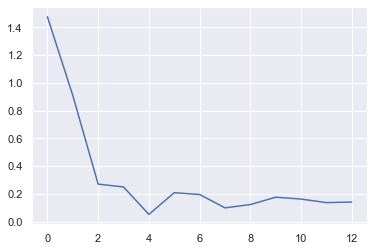

[1.47627119 0.909201   0.27005723 0.24975025 0.05184351 0.20821749
 0.19529164 0.09915668 0.12279441 0.17575689 0.16242354 0.13684299
 0.14111994]


In [110]:
plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

## Total Variance eplained by each component in PCA

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.35159973 0.21654207 0.06431884 0.05948238 0.04959063 0.04651211
 0.04185957 0.038684   0.03361017]


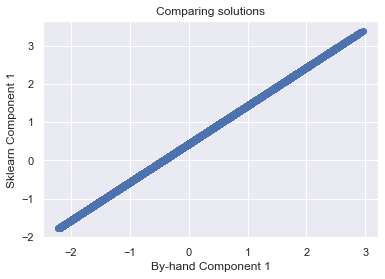

In [111]:
sklearn_pca = PCA(n_components=9)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(Xt)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

## Run Standard Scaler

In [112]:
scaled_features = churned.copy()
col_names = ['tenure', 'MonthlyCharges']
features = scaled_features[col_names]
#Fit Standard Scaler
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features[col_names] = features
scaled_features.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4025,2984-MIIZL,1,0,0,0,-0.987,1,0,2,0,0,1,0,0,0,0,1,0.238,321.900,1,0,0,0
927,9625-QSTYE,0,0,0,0,-0.611,1,0,2,0,1,1,0,0,0,0,1,0.461,952.300,1,0,1,0
4180,5482-PLVPE,0,1,0,0,-1.070,0,0,1,0,0,0,0,0,0,0,0,-1.532,41.850,1,0,1,0
6786,9820-RMCQV,0,0,0,0,-0.695,1,0,1,1,0,0,0,0,0,0,0,-0.683,501.000,1,1,0,0
3462,3834-XUIFC,1,0,0,0,-0.862,1,1,2,0,0,0,0,0,1,0,1,0.603,602.550,1,0,0,1


In [113]:
# Drop Features
X = scaled_features.drop(['customerID', 'Churn', 'TotalCharges', 'InternetService', 'PaymentMethod_Mailed check'], 1)
y = scaled_features.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
#Run Logistic Regression
lr = LogisticRegression(random_state=0)
# Fit the Model
lr = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_predicts = lr.predict_proba(X_test)
#Cross Validation
lr_score = cross_val_score(lr, X, y, cv=10)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (lr_score.mean(), lr_score.std() * 2))

Unweighted Accuracy: 0.77 (+/- 0.04)


## Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier
# Run Random Forest
rf = RandomForestClassifier(n_estimators=10)
# Fit the Model
rf = rf.fit(X_train, y_train)
# Cross Validation
rf_score = cross_val_score(rf, X, y, cv=10)
print('Cross_Val_Score: {}'.format(rf_score))
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (rf_score.mean(), rf_score.std() * 2))

Cross_Val_Score: [0.935   0.9125  0.93125 0.91625 0.91625 0.92125 0.935   0.92    0.9075
 0.9075 ]
Unweighted Accuracy: 0.92 (+/- 0.02)


## Standard Scaler on DataFrame

In [116]:
df = df.dropna()
X = StandardScaler().fit_transform(X)

# PCA to keep 95% of variance
pca = PCA(0.95)

# Components required to keep 95% of variance
x_pca = pca.fit_transform(X)

# Cumulative sum of explained variance by the components
var_cumsum=pca.explained_variance_ratio_.cumsum()
print(var_cumsum)
print('\n')
print('Need to keep {} components to explain 95% of the variance.'.format(len(var_cumsum)))

[0.20530663 0.35078718 0.42562882 0.49364017 0.54977367 0.60547367
 0.65672388 0.7051226  0.74877632 0.78882398 0.82672545 0.86350912
 0.89576344 0.92411576 0.95185748]


Need to keep 15 components to explain 95% of the variance.


<Figure size 432x432 with 0 Axes>

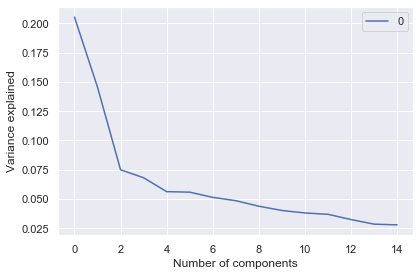

In [117]:
plt.figure(figsize=(6,6))
pd.DataFrame(list(pca.explained_variance_ratio_)).plot(kind='line')
plt.xlabel('Number of components')
plt.ylabel('Variance explained')
plt.savefig('PCA.png')

plt.tight_layout()
plt.show()

## Results
##### The 8 most important features (using Select K Best) in predicting customer churn at Telco:
<ul>
    <li>Senior Citizens</li>
    <li>Partner</li>
    <li>Tenure</li>
    <li>Online Security</li>
    <li>Device Protection</li>
    <li>Tech Support</li>
    <li>Paperless Billing</li>
    <li>Monthly Charges</li>
</ul>
    
##### Random Forest performed the best accuracy score (92% with 2% standard deviation) amongst the other models used on the baseline parameters.
##### Gradient Boost performed the best accuracy score after parameter tuning (93% with 2% standard deviation) amongst the other models used on randomized search.

##### Using the models with PCA did not have a significant difference in accuracy scores

## Next Steps
<ul>
    <li>Gather age group data</li>
    <li>Gather data from competing companies</li>
    <li>Gather behavioral data</li>
    <li>Further monitor low tenure customers</li>
    <li>Explore various networks</li>
    <li>Explore reliability issues</li>
    <li>Explore service plans</li>
</ul>